### Packages Download

In [4]:
!pip install compiam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 164 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 129 kB 49.7 MB/s 
     |████████████████████████████████| 14.0 MB 48.4 MB/s 
     |████████████████████████████████| 792 kB 55.5 MB/s 
     |████████████████████████████████| 183 kB 53.4 MB/s 
     |████████████████████████████████| 217 kB 58.3 MB/s 
     |████████████████████████████████| 14.9 MB 343 kB/s 
     |████████████████████████████████| 133 kB 54.0 MB/s 
     |████████████████████████████████| 90 kB 7.0 MB/s 
     |████████████████████████████████| 24.9 MB 1.7 MB/s 
     |████████████████████████████████| 3.0 MB 67.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.1 MB/s 
     |████████████████████████████████| 5.6 MB 61.9 MB/s 
     |████████████████

### Codes

In [5]:
import compiam

In [1]:
import librosa as lb
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
import pandas as pd
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [16]:
audio, fs = lb.load('/drive/My Drive/Projects/Wave-U-Net-Pytorch-Saraga/mixed.wav', sr=8000)

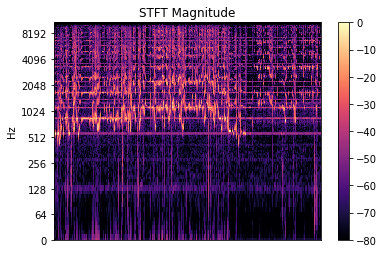

In [17]:
# STFT Maginitude
spect = lb.stft(audio)

rp = np.max(np.abs(spect))
lb.display.specshow(lb.amplitude_to_db(spect, ref=rp), y_axis='log')
plt.colorbar()
plt.title('STFT Magnitude')
plt.show()

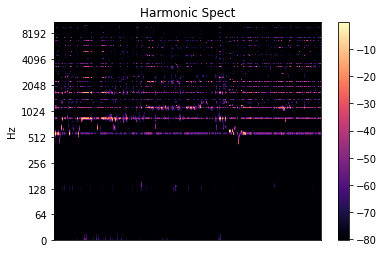

In [18]:
# Harmonics Spect
harmonic, percussive = lb.decompose.hpss(spect, margin=16)

lb.display.specshow(lb.amplitude_to_db(harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic Spect')
plt.show()

1025


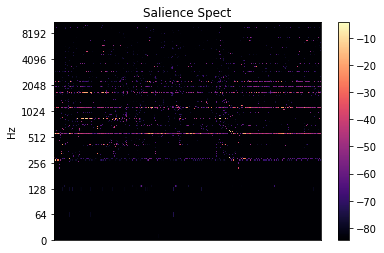

In [19]:
# Salience Representation
freqs = lb.fft_frequencies(sr=fs)
harms = [1, 2]
print(len(freqs))
salience = lb.salience(np.abs(harmonic), freqs=freqs, h_range=harms)

y = np.nan_to_num(salience)

lb.display.specshow(lb.amplitude_to_db(y, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Salience Spect')
plt.show()

In [9]:
salience_flatten = y.flatten()
salience_flatten

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
spect.shape, harmonic.shape, y.shape

((1025, 22011), (1025, 22011), (1025, 22011))

In [11]:
f = np.dstack((np.abs(spect), np.abs(harmonic), np.abs(y)))
f.shape

(1025, 22011, 3)

In [ ]:
(1025, 2813) (1025,)

In [2]:
'HI'.lower()

'hi'

In [12]:
def get_features(path, range, dataset):
  features = ['STFT', 'Harmonic', 'Salience']
  x, y = range
  files = sorted(os.listdir(path+dataset+'/'))
  groundtruth = sorted(os.listdir(path+dataset+'/tonic_'+dataset.lower()+'.csv'))
  for i in range(x, y):
    stft = pd.read_csv()



  return f

In [13]:
path = './Features/'
res = get_features(path, (0, 100), 'CM')
res.shape

(1025, 22011, 3)

In [14]:
#Features, CM, IITM, IISC, STFT, Harmonic, Salience

In [ ]:
path = 

In [ ]:
257, 11251

### 3D CNNs for Tonic Detection

In [90]:
from keras.layers import Input, Dense, Conv3D, Conv2D, MaxPooling2D, MaxPooling3D, \
Flatten, Dropout, BatchNormalization, Reshape
from keras.models import Model

In [91]:
batch_size = 16
epochs = 20
inp = Input(shape=(1025, 22011, 3, 1))
print(inp.shape)

(None, 1025, 22011, 3, 1)


In [101]:
print("INPUT", inp.shape)


# Conv1 #
x = Conv3D(64, (15, 15, 1), activation='relu', input_shape=inp.shape)(inp)
x = BatchNormalization()(x)
x = MaxPooling3D(pool_size=(3, 3, 1))(x)
x = Dropout(0.30)(x)
print("1st Layer", x.shape)

# Conv2 #
x = Conv3D(32, (9, 9, 2), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling3D(pool_size=(3, 3, 1))(x)
x = Dropout(0.30)(x)
print("2nd Layer", x.shape)

# Conv 3 #
x = Conv3D(16, (5, 5, 2), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling3D(pool_size=(3, 3, 1))(x)
x = Dropout(0.30)(x)
print("3rd Layer", x.shape)

x = Flatten()(x)
print("Flatten Layer", x.shape)

x = Dense(100, activation='relu')(x)
print("Dense Layer", x.shape)

x = Dense(1, activation='relu')(x)
print("Output Layer", x.shape)

INPUT (None, 1025, 22011, 3, 1)
1st Layer (None, 337, 7332, 3, 64)
2nd Layer (None, 109, 2441, 2, 32)
3rd Layer (None, 35, 812, 1, 16)
Flatten Layer (None, 454720)
Dense Layer (None, 100)
Output Layer (None, 1)


In [ ]:
x_train = 
y_train =
x_test = 
y_test = 

In [101]:
tonic_id = Model(inputs = inp, outputs = x)
tonic_id.compile(loss='MeanSquaredError', optimizer = 'adam', metrics='accuracy') 
tonic_id_train = tonic_id.fit(x_train, y_train, epochs = epochs ,batch_size=batch_size)

In [101]:
test_eval = tonic_id.evaluate(x_test,  y_test, verbose=0)
print('Test', test_eval)

In [101]:
plt.plot(tonic_id_train.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

In [ ]:
plt.plot(tonic_id_train.history['loss'])
plt.legend(['training'], loc = 'upper left')
plt.show()

In [ ]:
predictions = tonic_id.predict(x_test, verbose=1)
predictions.shape